In [3]:
from feature_extractors.pe_feature import PEFeatureExtractor


path = "D://SteamLibrary//steamapps//common//ENA Dream BBQ//ENA-4-DreamBBQ.exe"
with open(path, "rb") as f:
    bytez = f.read()
extractor = PEFeatureExtractor(version=2018)

# Extract the raw feature dict
raw = extractor.raw_features(bytez)

# Turn it into a flat vector (normalized)
vector = extractor.process_raw_features(raw)

print("Feature vector shape:", vector.shape)
print("SHA256 of file:", raw['sha256'])
print("Extracted features: ", raw)
print("First 10 values of vector:", vector[:100])

Feature vector shape: (2381,)
SHA256 of file: 4a6bff027d59a188938bd88b56fb71fb28efa70fe9de664c7b515c38d3cddd4b
Extracted features:  {'sha256': '4a6bff027d59a188938bd88b56fb71fb28efa70fe9de664c7b515c38d3cddd4b', 'histogram': [328120, 5312, 2879, 2893, 2691, 1634, 1393, 1198, 3081, 1302, 1115, 1018, 1123, 1509, 1077, 1338, 1501, 892, 546, 536, 710, 820, 739, 481, 1089, 599, 547, 496, 547, 559, 412, 475, 1317, 508, 434, 444, 1398, 490, 390, 502, 898, 896, 423, 650, 573, 904, 440, 424, 752, 484, 377, 672, 451, 305, 333, 330, 516, 369, 405, 695, 415, 408, 585, 976, 1486, 890, 390, 407, 716, 683, 423, 374, 3925, 913, 452, 321, 950, 603, 300, 297, 550, 269, 541, 562, 459, 483, 315, 466, 431, 322, 420, 463, 620, 591, 519, 476, 542, 683, 388, 642, 570, 897, 558, 375, 447, 596, 271, 430, 569, 472, 633, 614, 558, 223, 751, 729, 1398, 840, 507, 383, 487, 489, 372, 765, 566, 546, 478, 471, 637, 1897, 1055, 1958, 2324, 856, 527, 342, 475, 1153, 328, 2390, 549, 859, 287, 249, 432, 271, 256, 254, 312,

In [1]:
import feature_extractors
#data_dir = "F:\ember_dataset_2018_2\ember2018"
data_dir = "F:\ember+bodmas"

#feature_extractors.create_vectorized_features(data_dir, vers=2018)
X_train, y_train, X_test, y_test = feature_extractors.read_vectorized_features(data_dir, vers=2018)
import idk
import joblib

train_loader, val_loader, test_loader, scaler = idk.prepare_dataloaders(X_train, y_train, X_test, y_test)
joblib.dump(scaler, "scalers/scaler_EB.pkl")

<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
C:\Users\Alisa\AppData\Local\Temp\ipykernel_13380\1028424583.py:3: SyntaxWarning: invalid escape sequence '\e'
  data_dir = "F:\ember+bodmas"


['scalers/scaler_EB.pkl']

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

class Model_v1_2018(nn.Module):
    def __init__(self, input_dim=2381):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 2048),
            nn.Dropout(0.5),
            nn.BatchNorm1d(2048),
            nn.ReLU(),

            nn.Dropout(0.5),
            nn.Linear(2048, 1024),
            nn.BatchNorm1d(1024),  
            nn.ReLU(),
            
            nn.Linear(1024, 1024),
            nn.BatchNorm1d(1024),  
            nn.ReLU(),
            #nn.Linear(128, 64),
            #nn.ReLU(),
            #nn.BatchNorm1d(64),
            

            nn.Linear(1024, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

class Model_v2_2018(nn.Module):
    def __init__(self, input_dim=2381):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 2048),
            nn.BatchNorm1d(2048),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(2048, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

class Model_v3_2018(nn.Module):
    def __init__(self, input_dim=2381):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.Dropout(0.15),
            nn.BatchNorm1d(256),
            nn.ReLU(),

            nn.Dropout(0.15),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),  
            nn.ReLU(),
            
            #nn.Linear(1250, 1250),
            #nn.BatchNorm1d(1250),  
            #nn.ReLU(),
            #nn.Linear(128, 64),
            #nn.ReLU(),
            #nn.BatchNorm1d(64),
            

            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

class Model_v4_2018(nn.Module):
    def __init__(self, input_dim=2381):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 2048),
            nn.BatchNorm1d(2048),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(2048, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Dropout(0.5),
            
            nn.Linear(1024, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

----------Training on Model_v1_2018----------


Model_v1_2018(
  (net): Sequential(
    (0): Linear(in_features=2381, out_features=2048, bias=True)
    (1): Dropout(p=0.5, inplace=False)
    (2): BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
    (4): Dropout(p=0.5, inplace=False)
    (5): Linear(in_features=2048, out_features=1024, bias=True)
    (6): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReLU()
    (8): Linear(in_features=1024, out_features=1024, bias=True)
    (9): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Linear(in_features=1024, out_features=1, bias=True)
    (12): Sigmoid()
  )
)
Epoch 1 | Train Loss: 0.3043 | Train Acc: 0.8620 | Val Loss: 0.1777 | Val Acc: 0.9274
Saved model
Epoch 2 | Train Loss: 0.1799 | Train Acc: 0.9258 | Val Loss: 0.1487 | Val Acc: 0.9404
Saved model
Epoch 3 | Train Loss: 0.1538 | Train Acc

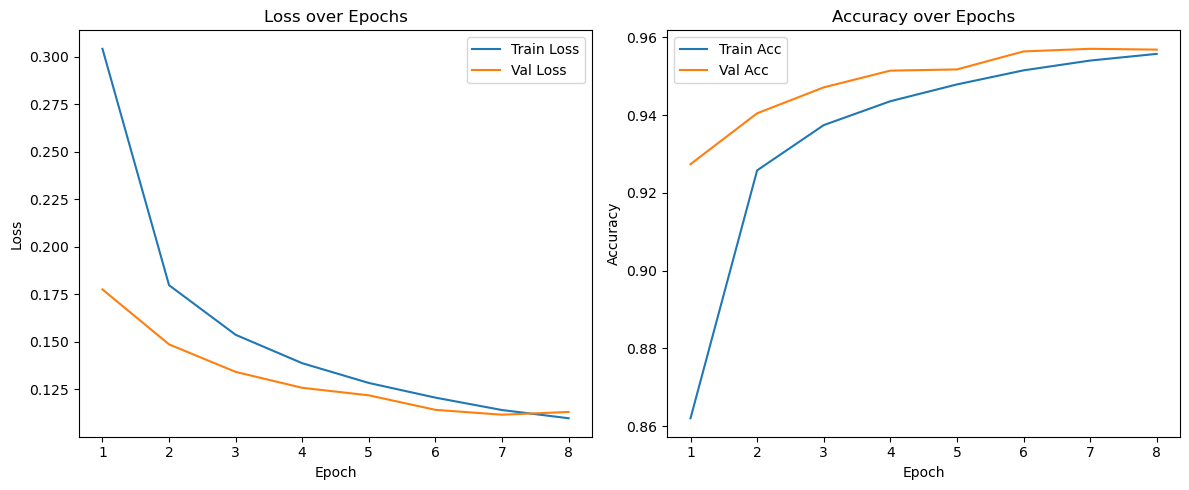

Test Accuracy: 0.941787
Test Precision: 0.917291
Test Recall: 0.968362
Test F1 Score: 0.942135
Test ROC AUC: 0.988689
AUC Score: 0.988689


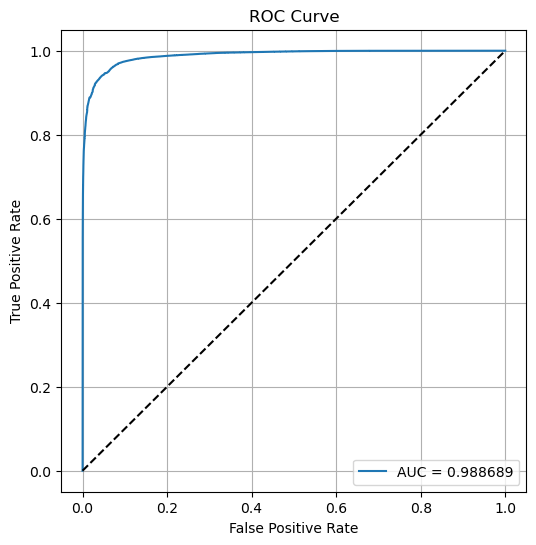

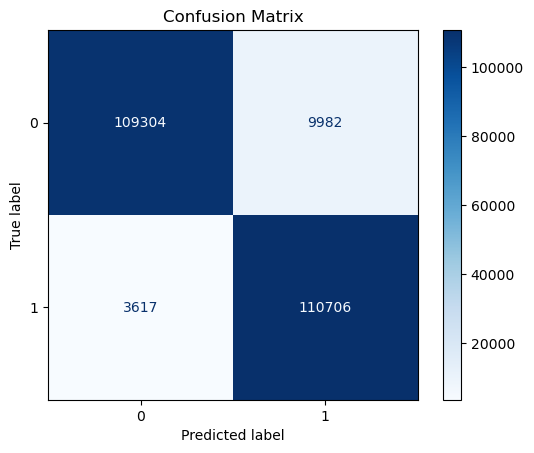


Performance at 1.0% FPR:
Threshold: 0.9790
False Positive Rate: 0.9984%
False Negative Rate: 14.9874%
Detection Rate (TPR): 85.0126%

Performance at 0.1% FPR:
Threshold: 0.9995
False Positive Rate: 0.0998%
False Negative Rate: 34.0002%
Detection Rate (TPR): 65.9998%


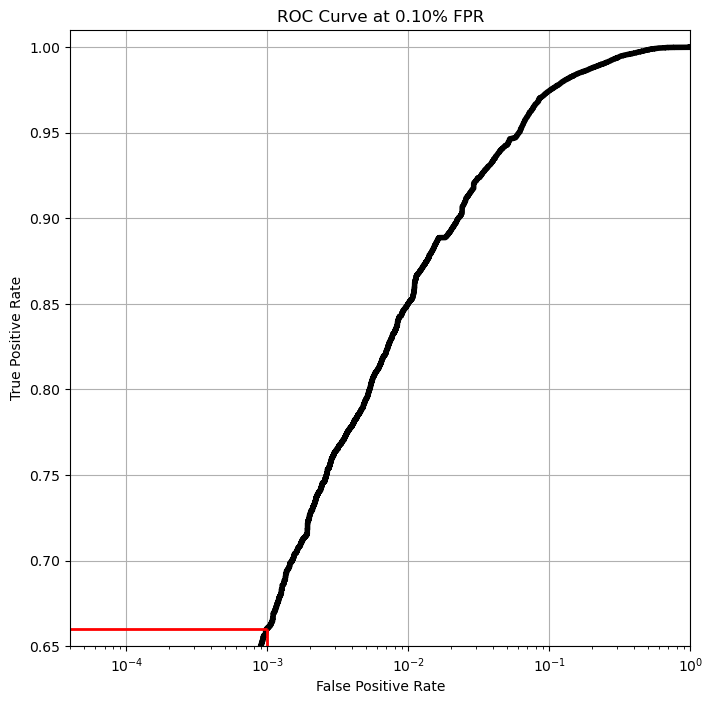

In [3]:
import torch.nn as nn
import torch.optim as optim
import idk

print("----------Training on Model_v1_2018----------\n\n")


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Model_v1_2018().to(device)
print(model)
results = idk.train_model(model, train_loader, val_loader, device, 20, 0.0001, "models/Model_v1_2018.pth")

idk.plot_training_metrics(
    results["train_losses"],
    results["val_losses"],
    results["train_accuracies"],
    results["val_accuracies"],
    model_name="Model_v1_2018"
)

test_results = idk.evaluate_model_on_test(model, test_loader, device)

idk.plot_roc_curve(test_results["labels"], test_results["probs"])
idk.plot_confusion_matrix(test_results["labels"], test_results["probs"])
idk.evaluate_at_fpr_thresholds(test_results["labels"], test_results["probs"])

----------Training on Model_v4_2018----------


Model_v4_2018(
  (net): Sequential(
    (0): Linear(in_features=2381, out_features=2048, bias=True)
    (1): BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=2048, out_features=1024, bias=True)
    (5): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=1024, out_features=1024, bias=True)
    (9): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.5, inplace=False)
    (12): Linear(in_features=1024, out_features=512, bias=True)
    (13): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Dropout(p=0.5, inplace=False)
    (16): Linear(in_features=512, out_features=256, bias=True)
    (17):

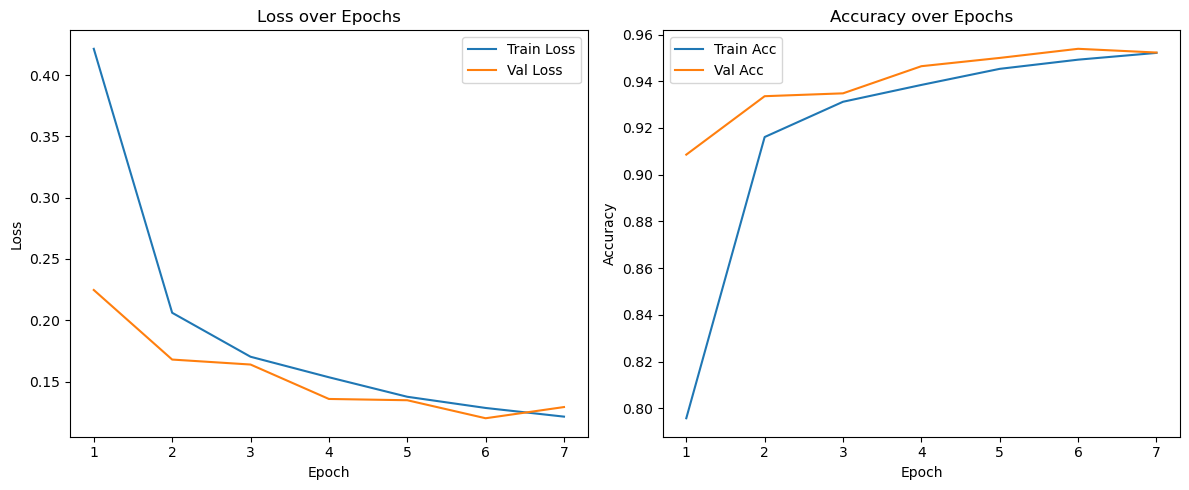

Test Accuracy: 0.930285
Test Precision: 0.909191
Test Recall: 0.956060
Test F1 Score: 0.932037
Test ROC AUC: 0.983094
AUC Score: 0.983094


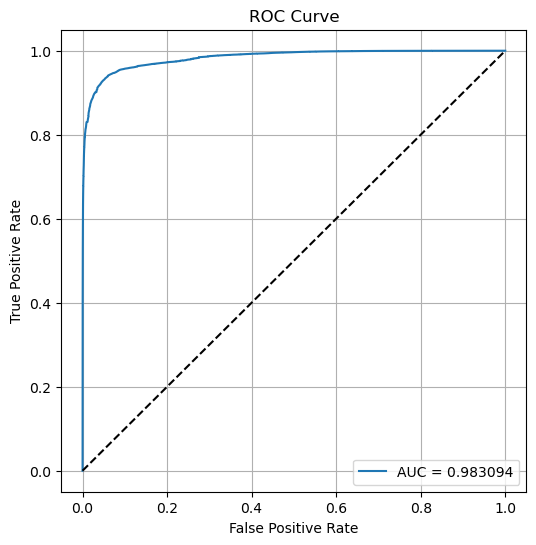

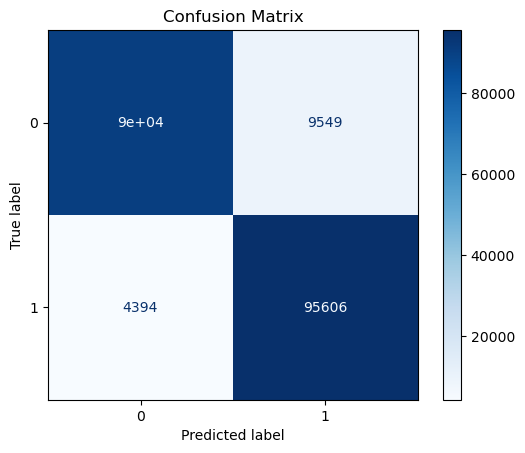


Performance at 1.0% FPR:
Threshold: 0.9874
False Positive Rate: 0.9550%
False Negative Rate: 16.9830%
Detection Rate (TPR): 83.0170%

Performance at 0.1% FPR:
Threshold: 0.9986
False Positive Rate: 0.0930%
False Negative Rate: 39.7420%
Detection Rate (TPR): 60.2580%


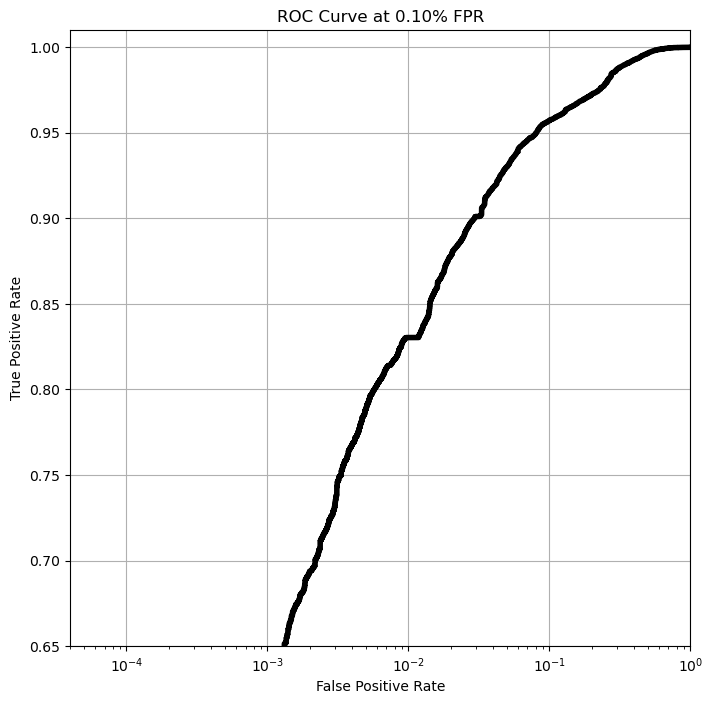

In [3]:
import torch.nn as nn
import torch.optim as optim
import idk

print("----------Training on Model_v4_2018----------\n\n")


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Model_v4_2018().to(device)
print(model)
results = idk.train_model(model, train_loader, val_loader, device, 20, 0.0001, "models/Model_v4_2018.pth")

idk.plot_training_metrics(
    results["train_losses"],
    results["val_losses"],
    results["train_accuracies"],
    results["val_accuracies"],
    model_name="Model_v4_2018"
)

test_results = idk.evaluate_model_on_test(model, test_loader, device)

idk.plot_roc_curve(test_results["labels"], test_results["probs"])
idk.plot_confusion_matrix(test_results["labels"], test_results["probs"])
idk.evaluate_at_fpr_thresholds(test_results["labels"], test_results["probs"])

----------Training on Model_v3_2018----------


Model_v3_2018(
  (net): Sequential(
    (0): Linear(in_features=2381, out_features=256, bias=True)
    (1): Dropout(p=0.15, inplace=False)
    (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
    (4): Dropout(p=0.15, inplace=False)
    (5): Linear(in_features=256, out_features=128, bias=True)
    (6): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=1, bias=True)
    (9): Sigmoid()
  )
)
Epoch 1 | Train Loss: 0.4291 | Train Acc: 0.8150 | Val Loss: 0.3050 | Val Acc: 0.8848
Saved model
Epoch 2 | Train Loss: 0.2632 | Train Acc: 0.8977 | Val Loss: 0.2320 | Val Acc: 0.9154
Saved model
Epoch 3 | Train Loss: 0.2129 | Train Acc: 0.9184 | Val Loss: 0.1993 | Val Acc: 0.9273
Saved model
Epoch 4 | Train Loss: 0.1855 | Train Acc: 0.9281 | Val Loss: 0.1755 | Val Acc: 0.9343
Saved model
Epoch 5 | Train Loss: 

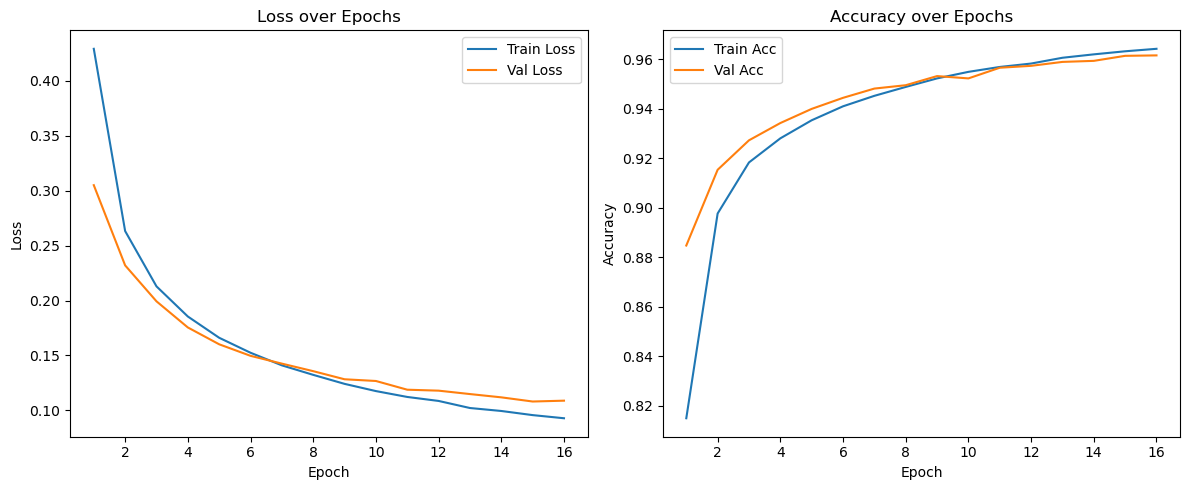

Test Accuracy: 0.946260
Test Precision: 0.943237
Test Recall: 0.949670
Test F1 Score: 0.946443
Test ROC AUC: 0.986047
AUC Score: 0.986047


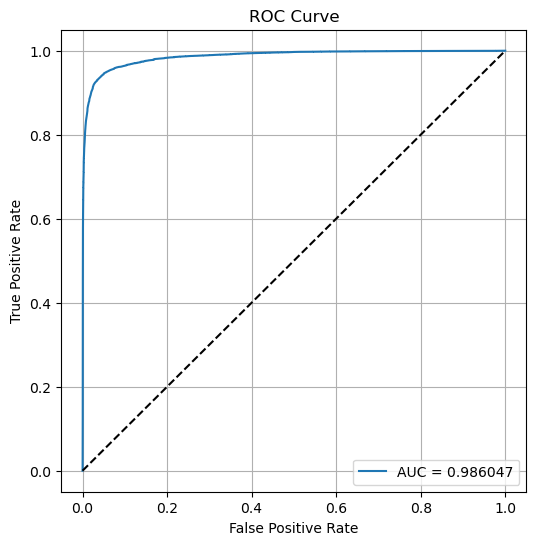

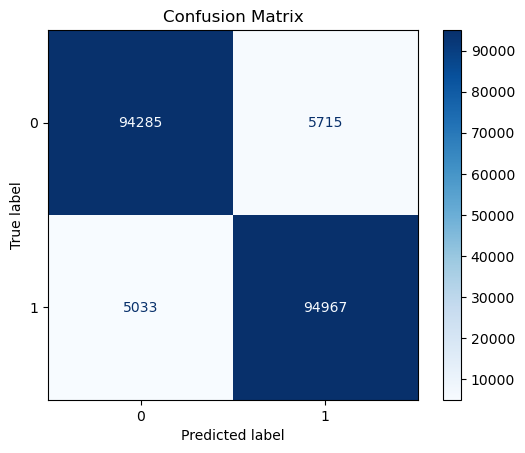


Performance at 1.0% FPR:
Threshold: 0.9237
False Positive Rate: 0.9980%
False Negative Rate: 15.4200%
Detection Rate (TPR): 84.5800%

Performance at 0.1% FPR:
Threshold: 0.9960
False Positive Rate: 0.1000%
False Negative Rate: 41.6390%
Detection Rate (TPR): 58.3610%


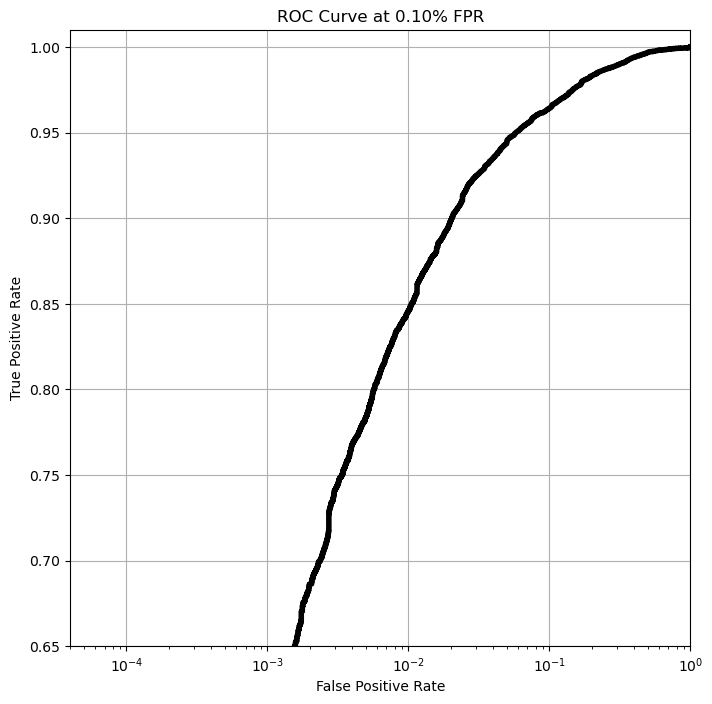

In [3]:
import torch.nn as nn
import torch.optim as optim
import idk

print("----------Training on Model_v3_2018----------\n\n")


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Model_v3_2018().to(device)
print(model)
results = idk.train_model(model, train_loader, val_loader, device, 20, 0.0001, "models/Model_v3_2018.pth")

idk.plot_training_metrics(
    results["train_losses"],
    results["val_losses"],
    results["train_accuracies"],
    results["val_accuracies"],
    model_name="Model_v3_2018"
)

test_results = idk.evaluate_model_on_test(model, test_loader, device)

idk.plot_roc_curve(test_results["labels"], test_results["probs"])
idk.plot_confusion_matrix(test_results["labels"], test_results["probs"])
idk.evaluate_at_fpr_thresholds(test_results["labels"], test_results["probs"])

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim

class FirstNN(nn.Module):
    def __init__(self, input_dim=2351):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 2048),
            nn.BatchNorm1d(2048),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(2048, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim

class FirstNNNoDropout(nn.Module):
    def __init__(self, input_dim=2351):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 1500),
            nn.BatchNorm1d(1500),
            nn.ReLU(),

            
            nn.Linear(1500, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

In [15]:
import torch
from torch.utils.data import TensorDataset, DataLoader, Subset
import numpy as np

# Calculate sizes
val_len = int(0.15 * len(X_train))
train_len = len(X_train) - val_len

# Just slice arrays — no copying or shuffling
X_val = X_train[-val_len:]
y_val = y_train[-val_len:]

X_train = X_train[:train_len]
y_train = y_train[:train_len]

# Calculate sizes
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).float().unsqueeze(1)

X_val_tensor = torch.from_numpy(X_val).float()
y_val_tensor = torch.from_numpy(y_val).float().unsqueeze(1)

# Create datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

# Create loaders
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)




In [3]:
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import DataLoader, Dataset
import numpy as np

# Calculate sizes
val_len = int(0.15 * len(X_train))
train_len = len(X_train) - val_len

# Slice arrays — no copying or shuffling
X_val = X_train[-val_len:]
y_val = y_train[-val_len:]

X_train = X_train[:train_len]
y_train = y_train[:train_len]

# Fit StandardScaler incrementally (efficient for large datasets)
scaler = StandardScaler()
batch_size_scaler = 10000
for i in range(0, X_train.shape[0], batch_size_scaler):
    scaler.partial_fit(X_train[i:i+batch_size_scaler])

# Custom dataset that applies scaling on-the-fly
class ScaledDataset(Dataset):
    def __init__(self, X, y, scaler):
        self.X = X
        self.y = y
        self.scaler = scaler

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        x_scaled = self.scaler.transform(self.X[idx].reshape(1, -1)).squeeze(0)
        return torch.tensor(x_scaled, dtype=torch.float32), torch.tensor(self.y[idx], dtype=torch.float32).unsqueeze(0)

# Wrap datasets
train_dataset = ScaledDataset(X_train, y_train, scaler)
val_dataset = ScaledDataset(X_val, y_val, scaler)

# Create loaders
batch_size = 8192
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)


In [14]:
int_arr = y_val.astype(np.int64)
counts = np.bincount(int_arr)
zeros = counts[0]
ones = counts[1]

print(f"Zeros: {zeros}, Ones: {ones}")

Zeros: 21007, Ones: 38993


In [18]:
import torch.nn as nn
import torch.optim as optim
import idk



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DNN()
results = idk.train_model(model, train_loader, val_loader, device, 10, 0.001, "DNN1.pth")


Epoch 1 | Train Loss: 0.0902 | Train Acc: 0.9666 | Val Loss: 0.0336 | Val Acc: 0.9872
Saved model
Epoch 2 | Train Loss: 0.0612 | Train Acc: 0.9782 | Val Loss: 0.0312 | Val Acc: 0.9890
Saved model
Epoch 3 | Train Loss: 0.0508 | Train Acc: 0.9821 | Val Loss: 0.0264 | Val Acc: 0.9906
Saved model
Epoch 4 | Train Loss: 0.0444 | Train Acc: 0.9843 | Val Loss: 0.0282 | Val Acc: 0.9907
Epoch 5 | Train Loss: 0.0402 | Train Acc: 0.9861 | Val Loss: 0.0270 | Val Acc: 0.9905
Epoch 6 | Train Loss: 0.0364 | Train Acc: 0.9871 | Val Loss: 0.0250 | Val Acc: 0.9915
Saved model
Epoch 7 | Train Loss: 0.0336 | Train Acc: 0.9882 | Val Loss: 0.0247 | Val Acc: 0.9914
Saved model
Epoch 8 | Train Loss: 0.0316 | Train Acc: 0.9890 | Val Loss: 0.0268 | Val Acc: 0.9907
Epoch 9 | Train Loss: 0.0297 | Train Acc: 0.9896 | Val Loss: 0.0259 | Val Acc: 0.9917
Epoch 10 | Train Loss: 0.0281 | Train Acc: 0.9902 | Val Loss: 0.0243 | Val Acc: 0.9924
Saved model


DNN


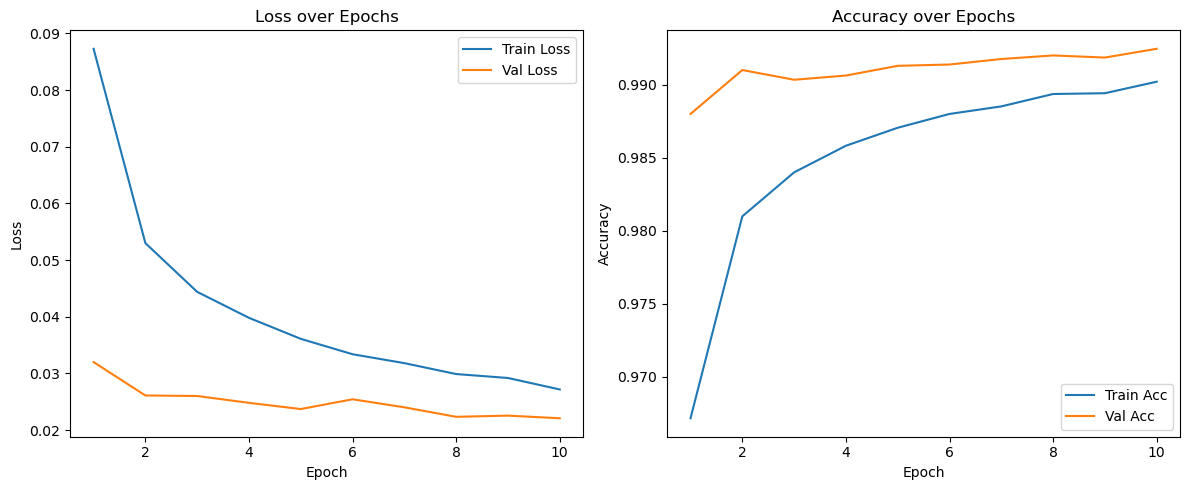

In [9]:
idk.plot_training_metrics(
    results["train_losses"],
    results["val_losses"],
    results["train_accuracies"],
    results["val_accuracies"],
    model_name="DNN"
)

In [10]:
from torch.utils.data import TensorDataset, DataLoader

X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).float()

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)


C:\Users\Alisa\AppData\Local\Temp\ipykernel_13424\2079155325.py:3: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_numpy.cpp:209.)
  X_test_tensor = torch.from_numpy(X_test).float()


Test Accuracy: 0.4970
Test Precision: 0.0737
Test Recall: 0.0005
Test F1 Score: 0.0010
Test ROC AUC: 0.4950
AUC Score: 0.4950


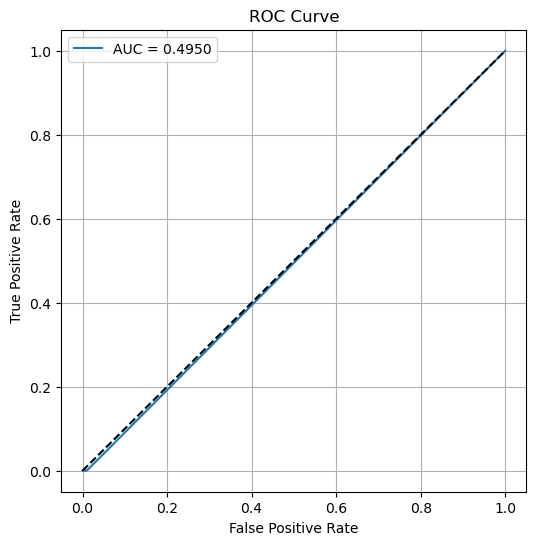

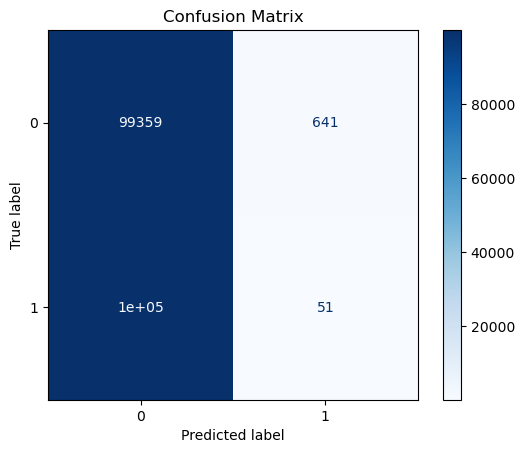

In [12]:
test_results = idk.evaluate_model_on_test(model, test_loader, device)

idk.plot_roc_curve(test_results["labels"], test_results["probs"])
idk.plot_confusion_matrix(test_results["labels"], test_results["probs"])

DNN


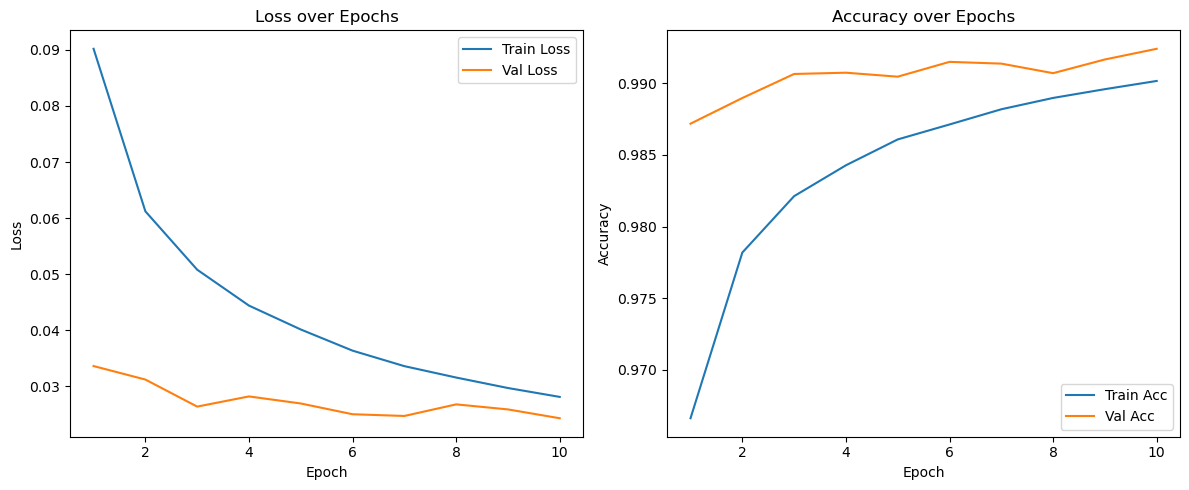

Test Accuracy: 0.4720
Test Precision: 0.0176
Test Recall: 0.0010
Test F1 Score: 0.0019
Test ROC AUC: 0.4707
AUC Score: 0.4707


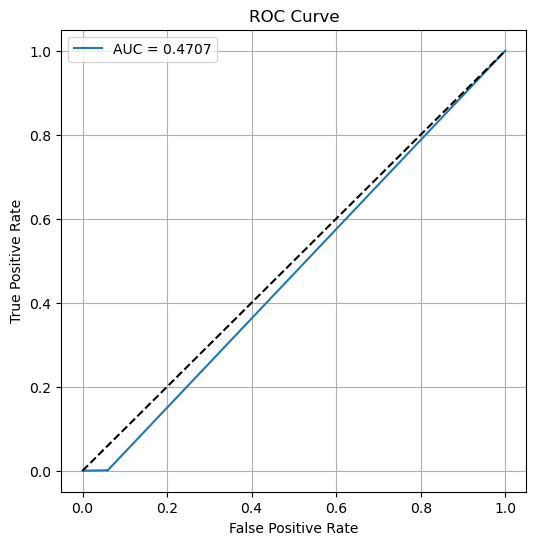

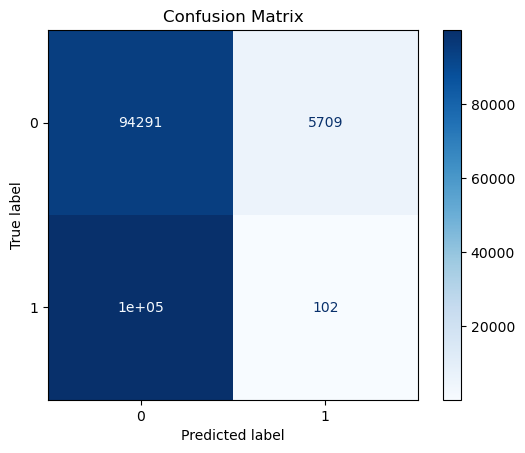

In [20]:
idk.plot_training_metrics(
    results["train_losses"],
    results["val_losses"],
    results["train_accuracies"],
    results["val_accuracies"],
    model_name="DNN"
)

from torch.utils.data import TensorDataset, DataLoader

X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).float()

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

test_results = idk.evaluate_model_on_test(model, test_loader, device)

idk.plot_roc_curve(test_results["labels"], test_results["probs"])
idk.plot_confusion_matrix(test_results["labels"], test_results["probs"])

In [27]:
import torch.nn as nn
import torch.optim as optim
import idk



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FirstNN()
results = idk.train_model(model, train_loader, val_loader, device, 10, 0.001, "firstNN.pth")

Epoch 1 | Train Loss: 0.0968 | Train Acc: 0.9659 | Val Loss: 0.0360 | Val Acc: 0.9872
Saved model
Epoch 2 | Train Loss: 0.0548 | Train Acc: 0.9812 | Val Loss: 0.0263 | Val Acc: 0.9900
Saved model
Epoch 3 | Train Loss: 0.0447 | Train Acc: 0.9849 | Val Loss: 0.0260 | Val Acc: 0.9912
Saved model
Epoch 4 | Train Loss: 0.0392 | Train Acc: 0.9866 | Val Loss: 0.0243 | Val Acc: 0.9916
Saved model
Epoch 5 | Train Loss: 0.0355 | Train Acc: 0.9880 | Val Loss: 0.0248 | Val Acc: 0.9916
Epoch 6 | Train Loss: 0.0325 | Train Acc: 0.9889 | Val Loss: 0.0254 | Val Acc: 0.9915
Epoch 7 | Train Loss: 0.0306 | Train Acc: 0.9898 | Val Loss: 0.0239 | Val Acc: 0.9923
Saved model
Epoch 8 | Train Loss: 0.0281 | Train Acc: 0.9904 | Val Loss: 0.0272 | Val Acc: 0.9930
Epoch 9 | Train Loss: 0.0266 | Train Acc: 0.9909 | Val Loss: 0.0226 | Val Acc: 0.9936
Saved model
Epoch 10 | Train Loss: 0.0255 | Train Acc: 0.9914 | Val Loss: 0.0229 | Val Acc: 0.9930


DNN


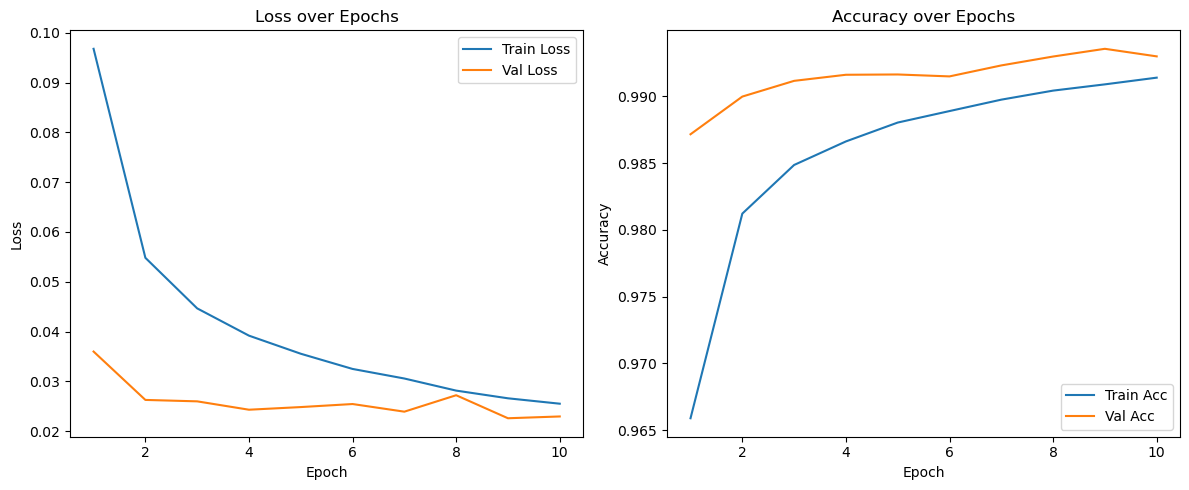

Test Accuracy: 0.5286
Test Precision: 0.5150
Test Recall: 0.9854
Test F1 Score: 0.6764
Test ROC AUC: 0.5295
AUC Score: 0.5295


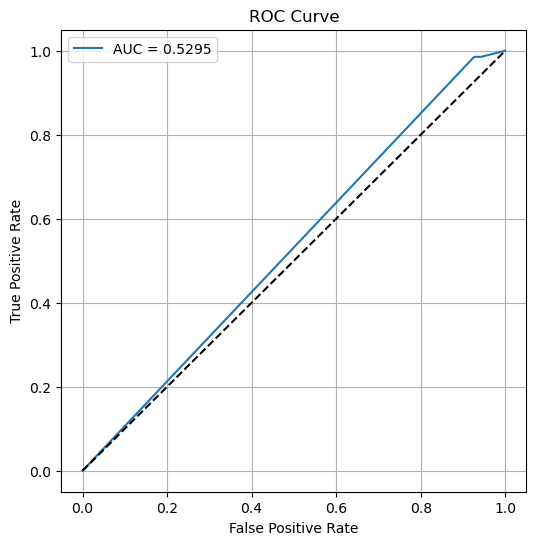

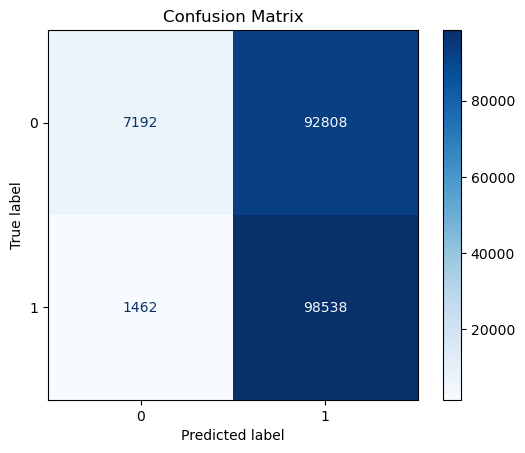

In [29]:
idk.plot_training_metrics(
    results["train_losses"],
    results["val_losses"],
    results["train_accuracies"],
    results["val_accuracies"],
    model_name="DNN"
)

from torch.utils.data import TensorDataset, DataLoader

X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).float()

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

test_results = idk.evaluate_model_on_test(model, test_loader, device)

idk.plot_roc_curve(test_results["labels"], test_results["probs"])
idk.plot_confusion_matrix(test_results["labels"], test_results["probs"])

In [4]:
import torch.nn as nn
import torch.optim as optim
import idk



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DNN3()
results = idk.train_model(model, train_loader, val_loader, device, 10, 0.0001, "DNN3_2018.pth")

Epoch 1 | Train Loss: 0.3173 | Train Acc: 0.8562 | Val Loss: 0.3178 | Val Acc: 0.8531
Saved model
Epoch 2 | Train Loss: 0.1919 | Train Acc: 0.9202 | Val Loss: 0.3012 | Val Acc: 0.8857
Saved model
Epoch 3 | Train Loss: 0.1660 | Train Acc: 0.9314 | Val Loss: 0.2928 | Val Acc: 0.8929
Saved model
Epoch 4 | Train Loss: 0.1514 | Train Acc: 0.9383 | Val Loss: 0.2873 | Val Acc: 0.8975
Saved model
Epoch 5 | Train Loss: 0.1397 | Train Acc: 0.9433 | Val Loss: 0.2696 | Val Acc: 0.9016
Saved model
Epoch 6 | Train Loss: 0.1319 | Train Acc: 0.9465 | Val Loss: 0.2686 | Val Acc: 0.9052
Saved model
Epoch 7 | Train Loss: 0.1269 | Train Acc: 0.9487 | Val Loss: 0.2613 | Val Acc: 0.9076
Saved model
Epoch 8 | Train Loss: 0.1191 | Train Acc: 0.9520 | Val Loss: 0.2582 | Val Acc: 0.9085
Saved model
Epoch 9 | Train Loss: 0.1157 | Train Acc: 0.9534 | Val Loss: 0.2657 | Val Acc: 0.9115
Epoch 10 | Train Loss: 0.1112 | Train Acc: 0.9553 | Val Loss: 0.2595 | Val Acc: 0.9139


DNN


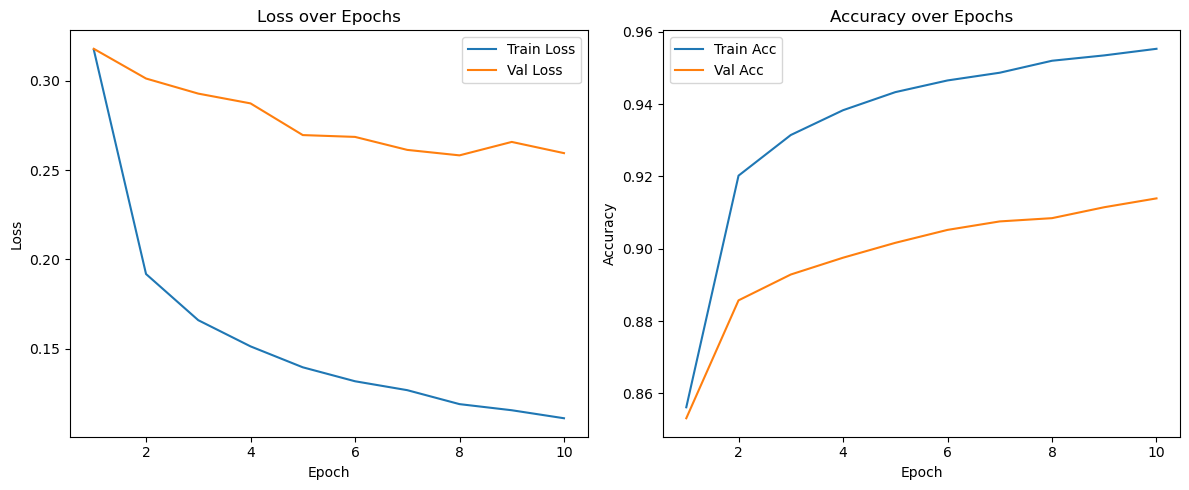

C:\Users\Alisa\AppData\Local\Temp\ipykernel_8736\1733657732.py:11: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_numpy.cpp:209.)
  X_test_tensor = torch.from_numpy(X_test).float()


Test Accuracy: 0.9214
Test Precision: 0.8896
Test Recall: 0.9623
Test F1 Score: 0.9245
Test ROC AUC: 0.9797
AUC Score: 0.9797


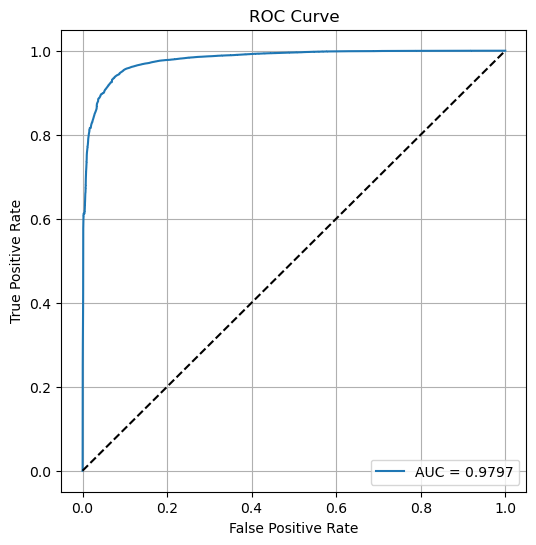

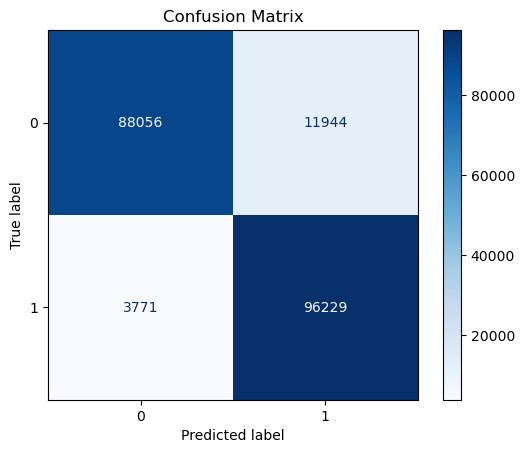

In [5]:
idk.plot_training_metrics(
    results["train_losses"],
    results["val_losses"],
    results["train_accuracies"],
    results["val_accuracies"],
    model_name="DNN"
)

from torch.utils.data import TensorDataset, DataLoader

X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).float()

test_dataset = ScaledDataset(X_test, y_test, scaler)
test_loader = DataLoader(test_dataset, batch_size=8192, shuffle=False)

test_results = idk.evaluate_model_on_test(model, test_loader, device)

idk.plot_roc_curve(test_results["labels"], test_results["probs"])
idk.plot_confusion_matrix(test_results["labels"], test_results["probs"])

In [5]:
import torch.nn as nn
import torch.optim as optim
import idk



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DNN3()
results = idk.train_model(model, train_loader, val_loader, device, 20, 0.0001, "DNN3.pth")

idk.plot_training_metrics(
    results["train_losses"],
    results["val_losses"],
    results["train_accuracies"],
    results["val_accuracies"],
    model_name="DNN3"
)

from torch.utils.data import TensorDataset, DataLoader

X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).float()

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=8192, shuffle=False)

test_results = idk.evaluate_model_on_test(model, test_loader, device)

idk.plot_roc_curve(test_results["labels"], test_results["probs"])
idk.plot_confusion_matrix(test_results["labels"], test_results["probs"])

Epoch 1 | Train Loss: 0.1263 | Train Acc: 0.9525 | Val Loss: 0.0357 | Val Acc: 0.9885
Saved model
Epoch 2 | Train Loss: 0.0379 | Train Acc: 0.9874 | Val Loss: 0.0233 | Val Acc: 0.9926
Saved model
Epoch 3 | Train Loss: 0.0249 | Train Acc: 0.9919 | Val Loss: 0.0213 | Val Acc: 0.9925
Saved model
Epoch 4 | Train Loss: 0.0179 | Train Acc: 0.9943 | Val Loss: 0.0209 | Val Acc: 0.9933
Saved model
Epoch 5 | Train Loss: 0.0144 | Train Acc: 0.9955 | Val Loss: 0.0217 | Val Acc: 0.9935
Epoch 6 | Train Loss: 0.0124 | Train Acc: 0.9961 | Val Loss: 0.0217 | Val Acc: 0.9924
Epoch 7 | Train Loss: 0.0098 | Train Acc: 0.9969 | Val Loss: 0.0181 | Val Acc: 0.9944
Saved model


KeyboardInterrupt: 

DNN3(
  (net): Sequential(
    (0): Linear(in_features=2351, out_features=2400, bias=True)
    (1): BatchNorm1d(2400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=2400, out_features=1200, bias=True)
    (4): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=1200, out_features=1200, bias=True)
    (7): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=1200, out_features=1, bias=True)
    (10): Sigmoid()
  )
)


C:\Users\Alisa\AppData\Local\Temp\ipykernel_11108\572893209.py:14: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_numpy.cpp:209.)
  X_test_tensor = torch.from_numpy(X_test).float()


Test Accuracy: 0.9904
Test Precision: 0.9936
Test Recall: 0.9871
Test F1 Score: 0.9903
Test ROC AUC: 0.9989
AUC Score: 0.9989


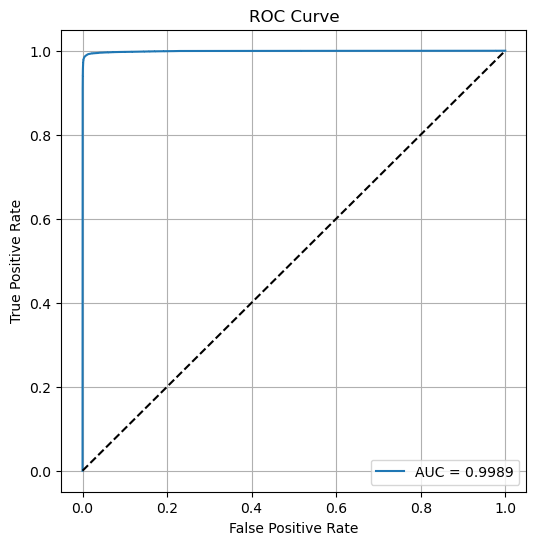

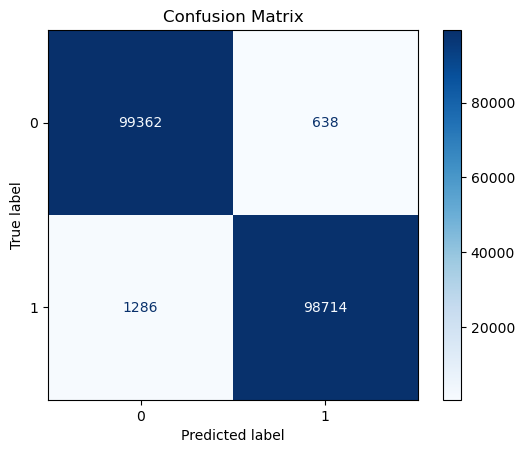

In [5]:
import torch.nn as nn
import torch.optim as optim
import idk



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DNN3().to(device)
model.load_state_dict(torch.load("DNN3.pth"))
print(model)

from torch.utils.data import TensorDataset, DataLoader

X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).float()

test_dataset = ScaledDataset(X_test, y_test, scaler)
test_loader = DataLoader(test_dataset, batch_size=8192, shuffle=False)

test_results = idk.evaluate_model_on_test(model, test_loader, device)

idk.plot_roc_curve(test_results["labels"], test_results["probs"])
idk.plot_confusion_matrix(test_results["labels"], test_results["probs"])

FirstNN(
  (net): Sequential(
    (0): Linear(in_features=2351, out_features=2048, bias=True)
    (1): BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=2048, out_features=1024, bias=True)
    (5): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=1024, out_features=512, bias=True)
    (9): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.5, inplace=False)
    (12): Linear(in_features=512, out_features=256, bias=True)
    (13): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Dropout(p=0.5, inplace=False)
    (16): Linear(in_features=256, out_features=1, bias=True)
    (17): Sigmoid()
  )
)


C:\Users\Alisa\AppData\Local\Temp\ipykernel_4680\655580116.py:14: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_numpy.cpp:209.)
  X_test_tensor = torch.from_numpy(X_test).float()


Test Accuracy: 0.9880
Test Precision: 0.9913
Test Recall: 0.9847
Test F1 Score: 0.9880
Test ROC AUC: 0.9987
AUC Score: 0.9987


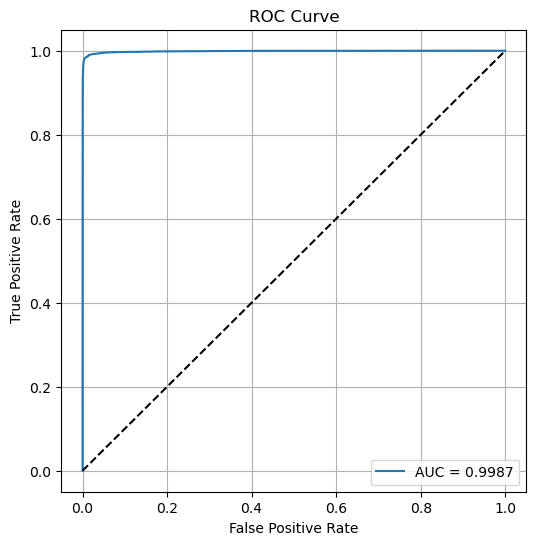

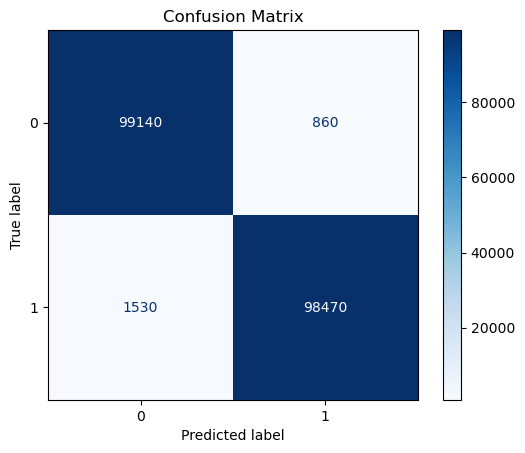

In [8]:
import torch.nn as nn
import torch.optim as optim
import idk



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FirstNN().to(device)
model.load_state_dict(torch.load("firstNN2.pth"))
print(model)

from torch.utils.data import TensorDataset, DataLoader

X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).float()

test_dataset = ScaledDataset(X_test, y_test, scaler)
test_loader = DataLoader(test_dataset, batch_size=8192, shuffle=False)

test_results = idk.evaluate_model_on_test(model, test_loader, device)

idk.plot_roc_curve(test_results["labels"], test_results["probs"])
idk.plot_confusion_matrix(test_results["labels"], test_results["probs"])